In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
df = pd.read_csv("PSL.csv")

In [161]:
df.head()

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,is_wicket,player_dismissed,dismissal_kind,fielder,winner,win_by,match_type,player_of_match,umpire_1,umpire_2
0,1,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,1,...,True,Mohammad Hafeez,caught,Sharjeel Khan,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
1,2,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,2,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
2,3,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,3,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
3,4,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,4,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
4,5,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,5,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza


In [162]:
df.columns


Index(['id', 'match_id', 'date', 'season', 'venue', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder', 'winner', 'win_by',
       'match_type', 'player_of_match', 'umpire_1', 'umpire_2'],
      dtype='object')

In [163]:
df['date'] = pd.to_datetime(df['date'])


In [164]:
df.head()

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,is_wicket,player_dismissed,dismissal_kind,fielder,winner,win_by,match_type,player_of_match,umpire_1,umpire_2
0,1,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,1,...,True,Mohammad Hafeez,caught,Sharjeel Khan,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
1,2,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,2,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
2,3,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,3,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
3,4,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,4,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
4,5,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,5,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza


In [165]:
# Convert date column to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Remove duplicates to get one row per match
match_df = df.drop_duplicates(subset='match_id')[['match_id', 'date']]

# Sort by date and assign match number
match_df = match_df.sort_values('date').reset_index(drop=True)
match_df['match_number'] = match_df.index + 1

# Merge match number back into original dataframe
df = df.merge(match_df[['match_id', 'match_number']], on='match_id', how='left')


In [166]:
df.head()

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,player_dismissed,dismissal_kind,fielder,winner,win_by,match_type,player_of_match,umpire_1,umpire_2,match_number
0,1,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,1,...,Mohammad Hafeez,caught,Sharjeel Khan,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24
1,2,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,2,...,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24
2,3,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,3,...,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24
3,4,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,4,...,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24
4,5,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,5,...,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24


In [167]:
total_score_df = df.groupby(['match_number', 'inning'])['total_runs'].sum().reset_index()


In [168]:
total_score_df

,match_number,inning,total_runs
0,1,1,128
1,1,2,132
2,2,1,125
3,2,2,131
4,3,1,145
...,...,...,...
561,278,2,135
562,279,1,185
563,279,2,189
564,280,1,159


In [169]:
total_score_df.shape

(566, 3)

In [170]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [171]:
total_score_df

,match_number,inning,total_runs
0,1,1,128
2,2,1,125
4,3,1,145
6,4,1,147
8,5,1,117
...,...,...,...
556,276,1,185
558,277,1,146
560,278,1,174
562,279,1,185


In [172]:
df = df.merge(total_score_df[['match_number', 'inning', 'total_runs']],
              on=['match_number', 'inning'], how='left')


In [173]:
df.head()

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,dismissal_kind,fielder,winner,win_by,match_type,player_of_match,umpire_1,umpire_2,match_number,total_runs_y
0,1,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,1,...,caught,Sharjeel Khan,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,190.0
1,2,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,2,...,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,190.0
2,3,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,3,...,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,190.0
3,4,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,4,...,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,190.0
4,5,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,5,...,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,190.0


In [174]:
df['batting_team'].unique()

array(['Peshawar Zalmi', 'Islamabad United', 'Quetta Gladiators',
       'Lahore Qalandars', 'Karachi Kings', 'Multan Sultans'],
      dtype=object)

In [175]:
df.columns

Index(['id', 'match_id', 'date', 'season', 'venue', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs_x', 'extras_type',
       'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder', 'winner',
       'win_by', 'match_type', 'player_of_match', 'umpire_1', 'umpire_2',
       'match_number', 'total_runs_y'],
      dtype='object')

In [176]:
df['venue'].unique()

array(['Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Gaddafi Stadium', 'National Stadium', 'Sheikh Zayed Stadium',
       'Multan Cricket Stadium', 'Rawalpindi Cricket Stadium',
       'National Stadium, Karachi', 'Sheikh Zayed Stadium, Abu Dhabi',
       'Gaddafi Stadium, Lahore'], dtype=object)

In [177]:
df['city'] = df['venue'].str.split(',').str[-1].str.strip()


In [178]:
df.head()

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,fielder,winner,win_by,match_type,player_of_match,umpire_1,umpire_2,match_number,total_runs_y,city
0,1,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,1,...,Sharjeel Khan,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,190.0,Dubai International Cricket Stadium
1,2,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,2,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,190.0,Dubai International Cricket Stadium
2,3,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,3,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,190.0,Dubai International Cricket Stadium
3,4,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,4,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,190.0,Dubai International Cricket Stadium
4,5,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,5,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,190.0,Dubai International Cricket Stadium


In [179]:
df['city'].unique()

array(['Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Gaddafi Stadium', 'National Stadium', 'Sheikh Zayed Stadium',
       'Multan Cricket Stadium', 'Rawalpindi Cricket Stadium', 'Karachi',
       'Abu Dhabi', 'Lahore'], dtype=object)

In [180]:
df = df[df['inning'] == 2]

In [181]:
df.head()

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,fielder,winner,win_by,match_type,player_of_match,umpire_1,umpire_2,match_number,total_runs_y,city
124,125,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,1,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium
125,126,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,2,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium
126,127,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,3,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium
127,128,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,4,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium
128,129,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,5,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium


In [182]:
total_score_df = df.groupby(['match_number', 'inning'])['total_runs_x'].sum().reset_index()


In [183]:
total_score_df

,match_number,inning,total_runs_x
0,1,2,132
1,2,2,131
2,3,2,121
3,4,2,153
4,5,2,118
...,...,...,...
273,276,2,106
274,277,2,147
275,278,2,135
276,279,2,189


In [184]:
df

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,fielder,winner,win_by,match_type,player_of_match,umpire_1,umpire_2,match_number,total_runs_y,city
124,125,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,1,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium
125,126,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,2,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium
126,127,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,3,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium
127,128,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,4,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium
128,129,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,5,...,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66107,507,959221,2016-02-23,2016,Dubai International Cricket Stadium,2,Islamabad United,Quetta Gladiators,18,6,...,NaN,Islamabad United,wickets 6,final,DR Smith,JS Wilson,Aleem Dar,23,NaN,Dubai International Cricket Stadium
66108,508,959221,2016-02-23,2016,Dubai International Cricket Stadium,2,Islamabad United,Quetta Gladiators,19,1,...,NaN,Islamabad United,wickets 6,final,DR Smith,JS Wilson,Aleem Dar,23,NaN,Dubai International Cricket Stadium
66109,509,959221,2016-02-23,2016,Dubai International Cricket Stadium,2,Islamabad United,Quetta Gladiators,19,2,...,Zulfiqar Babar,Islamabad United,wickets 6,final,DR Smith,JS Wilson,Aleem Dar,23,NaN,Dubai International Cricket Stadium
66110,510,959221,2016-02-23,2016,Dubai International Cricket Stadium,2,Islamabad United,Quetta Gladiators,19,3,...,NaN,Islamabad United,wickets 6,final,DR Smith,JS Wilson,Aleem Dar,23,NaN,Dubai International Cricket Stadium


In [34]:
df['current_score'] = df.groupby(['match_number', 'inning'])['batsman_runs'].cumsum()



In [35]:
df

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,winner,win_by,match_type,player_of_match,umpire_1,umpire_2,match_number,total_runs_y,city,current_score
124,125,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,1,...,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium,4
125,126,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,2,...,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium,4
126,127,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,3,...,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium,8
127,128,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,4,...,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium,9
128,129,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,5,...,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66107,507,959221,2016-02-23,2016,Dubai International Cricket Stadium,2,Islamabad United,Quetta Gladiators,18,6,...,Islamabad United,wickets 6,final,DR Smith,JS Wilson,Aleem Dar,23,NaN,Dubai International Cricket Stadium,164
66108,508,959221,2016-02-23,2016,Dubai International Cricket Stadium,2,Islamabad United,Quetta Gladiators,19,1,...,Islamabad United,wickets 6,final,DR Smith,JS Wilson,Aleem Dar,23,NaN,Dubai International Cricket Stadium,168
66109,509,959221,2016-02-23,2016,Dubai International Cricket Stadium,2,Islamabad United,Quetta Gladiators,19,2,...,Islamabad United,wickets 6,final,DR Smith,JS Wilson,Aleem Dar,23,NaN,Dubai International Cricket Stadium,168
66110,510,959221,2016-02-23,2016,Dubai International Cricket Stadium,2,Islamabad United,Quetta Gladiators,19,3,...,Islamabad United,wickets 6,final,DR Smith,JS Wilson,Aleem Dar,23,NaN,Dubai International Cricket Stadium,169


In [36]:
df['runs_left'] = df['total_runs_x_y'] - df['current_score']

KeyError: 'total_runs_x_y'

In [37]:
df

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,winner,win_by,match_type,player_of_match,umpire_1,umpire_2,match_number,total_runs_y,city,current_score
124,125,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,1,...,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium,4
125,126,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,2,...,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium,4
126,127,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,3,...,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium,8
127,128,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,4,...,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium,9
128,129,1075986,2017-02-09,2017,Dubai International Cricket Stadium,2,Islamabad United,Peshawar Zalmi,1,5,...,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza,24,NaN,Dubai International Cricket Stadium,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66107,507,959221,2016-02-23,2016,Dubai International Cricket Stadium,2,Islamabad United,Quetta Gladiators,18,6,...,Islamabad United,wickets 6,final,DR Smith,JS Wilson,Aleem Dar,23,NaN,Dubai International Cricket Stadium,164
66108,508,959221,2016-02-23,2016,Dubai International Cricket Stadium,2,Islamabad United,Quetta Gladiators,19,1,...,Islamabad United,wickets 6,final,DR Smith,JS Wilson,Aleem Dar,23,NaN,Dubai International Cricket Stadium,168
66109,509,959221,2016-02-23,2016,Dubai International Cricket Stadium,2,Islamabad United,Quetta Gladiators,19,2,...,Islamabad United,wickets 6,final,DR Smith,JS Wilson,Aleem Dar,23,NaN,Dubai International Cricket Stadium,168
66110,510,959221,2016-02-23,2016,Dubai International Cricket Stadium,2,Islamabad United,Quetta Gladiators,19,3,...,Islamabad United,wickets 6,final,DR Smith,JS Wilson,Aleem Dar,23,NaN,Dubai International Cricket Stadium,169


In [185]:
df = df.merge(total_score_df[['match_number', 'inning', 'total_runs_x']],
              on=['match_number', 'inning'], how='right')


In [186]:
df.head()

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,winner,win_by,match_type,player_of_match,umpire_1,umpire_2,match_number,total_runs_y,city,total_runs_x_y
0,382,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,1,...,Quetta Gladiators,wickets 8,regular,Mohammad Nawaz (3),JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,132
1,383,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,2,...,Quetta Gladiators,wickets 8,regular,Mohammad Nawaz (3),JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,132
2,384,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,3,...,Quetta Gladiators,wickets 8,regular,Mohammad Nawaz (3),JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,132
3,385,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,4,...,Quetta Gladiators,wickets 8,regular,Mohammad Nawaz (3),JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,132
4,386,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,5,...,Quetta Gladiators,wickets 8,regular,Mohammad Nawaz (3),JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,132


In [40]:
df['balls_left'] = 126 - (df['over']*6 + df['ball'])

In [41]:
df

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,match_type,player_of_match,umpire_1,umpire_2,match_number,total_runs_y,city,current_score,total_runs_x_y,balls_left
0,382,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,1,...,regular,Mohammad Nawaz (3),JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,0,132,119
1,383,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,2,...,regular,Mohammad Nawaz (3),JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,0,132,118
2,384,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,3,...,regular,Mohammad Nawaz (3),JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,0,132,117
3,385,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,4,...,regular,Mohammad Nawaz (3),JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,2,132,116
4,386,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,5,...,regular,Mohammad Nawaz (3),JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,2,132,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31830,498,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,2,...,final,Imad Wasim,Ahsan Raza,CB Gaffaney,280,NaN,Karachi,152,163,4
31831,499,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,3,...,final,Imad Wasim,Ahsan Raza,CB Gaffaney,280,NaN,Karachi,152,163,3
31832,500,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,4,...,final,Imad Wasim,Ahsan Raza,CB Gaffaney,280,NaN,Karachi,153,163,2
31833,501,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,5,...,final,Imad Wasim,Ahsan Raza,CB Gaffaney,280,NaN,Karachi,153,163,1


In [97]:
df['player_dismissed'] = df['player_dismissed'].fillna(0)
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 1 if x != 0 else 0)
df['player_dismissed'] = df['player_dismissed'].astype(int)
df['wickets'] = df.groupby(['match_number', 'inning'])['player_dismissed'].cumsum()
import numpy as np
df['wickets'] = np.where(df['wickets'] > 10, 10, df['wickets'])




In [98]:
df

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,umpire_1,umpire_2,match_number,total_runs_y,city,current_score,runs_left,total_runs_x_y,balls_left,wickets
0,382,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,1,...,JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,0,0,132,119,0
1,383,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,2,...,JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,0,0,132,118,0
2,384,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,3,...,JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,0,0,132,117,0
3,385,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,4,...,JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,2,0,132,116,0
4,386,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,5,...,JS Wilson,Shozab Raza,1,NaN,Dubai International Cricket Stadium,2,-2,132,115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31830,498,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,2,...,Ahsan Raza,CB Gaffaney,280,NaN,Karachi,152,-148,163,4,7
31831,499,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,3,...,Ahsan Raza,CB Gaffaney,280,NaN,Karachi,152,-151,163,3,7
31832,500,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,4,...,Ahsan Raza,CB Gaffaney,280,NaN,Karachi,153,-152,163,2,7
31833,501,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,5,...,Ahsan Raza,CB Gaffaney,280,NaN,Karachi,153,-153,163,1,8


In [99]:
df['crr'] = (df['current_score']*6)/(120 - df['balls_left'])

In [100]:
df

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,umpire_2,match_number,total_runs_y,city,current_score,runs_left,total_runs_x_y,balls_left,wickets,crr
0,382,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,1,...,Shozab Raza,1,NaN,Dubai International Cricket Stadium,0,0,132,119,0,0.000000
1,383,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,2,...,Shozab Raza,1,NaN,Dubai International Cricket Stadium,0,0,132,118,0,0.000000
2,384,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,3,...,Shozab Raza,1,NaN,Dubai International Cricket Stadium,0,0,132,117,0,0.000000
3,385,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,4,...,Shozab Raza,1,NaN,Dubai International Cricket Stadium,2,0,132,116,0,3.000000
4,386,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,5,...,Shozab Raza,1,NaN,Dubai International Cricket Stadium,2,-2,132,115,0,2.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31830,498,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,2,...,CB Gaffaney,280,NaN,Karachi,152,-148,163,4,7,7.862069
31831,499,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,3,...,CB Gaffaney,280,NaN,Karachi,152,-151,163,3,7,7.794872
31832,500,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,4,...,CB Gaffaney,280,NaN,Karachi,153,-152,163,2,7,7.779661
31833,501,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,5,...,CB Gaffaney,280,NaN,Karachi,153,-153,163,1,8,7.714286


In [101]:
df['rrr'] = (df['runs_left']*6)/df['balls_left']

In [102]:
df

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,match_number,total_runs_y,city,current_score,runs_left,total_runs_x_y,balls_left,wickets,crr,rrr
0,382,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,1,...,1,NaN,Dubai International Cricket Stadium,0,0,132,119,0,0.000000,0.000000
1,383,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,2,...,1,NaN,Dubai International Cricket Stadium,0,0,132,118,0,0.000000,0.000000
2,384,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,3,...,1,NaN,Dubai International Cricket Stadium,0,0,132,117,0,0.000000,0.000000
3,385,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,4,...,1,NaN,Dubai International Cricket Stadium,2,0,132,116,0,3.000000,0.000000
4,386,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,5,...,1,NaN,Dubai International Cricket Stadium,2,-2,132,115,0,2.400000,-0.104348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31830,498,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,2,...,280,NaN,Karachi,152,-148,163,4,7,7.862069,-222.000000
31831,499,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,3,...,280,NaN,Karachi,152,-151,163,3,7,7.794872,-302.000000
31832,500,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,4,...,280,NaN,Karachi,153,-152,163,2,7,7.779661,-456.000000
31833,501,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,5,...,280,NaN,Karachi,153,-153,163,1,8,7.714286,-918.000000


In [103]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [104]:
df['result'] = df.apply(result,axis=1)

In [105]:
df

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,total_runs_y,city,current_score,runs_left,total_runs_x_y,balls_left,wickets,crr,rrr,result
0,382,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,1,...,NaN,Dubai International Cricket Stadium,0,0,132,119,0,0.000000,0.000000,1
1,383,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,2,...,NaN,Dubai International Cricket Stadium,0,0,132,118,0,0.000000,0.000000,1
2,384,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,3,...,NaN,Dubai International Cricket Stadium,0,0,132,117,0,0.000000,0.000000,1
3,385,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,4,...,NaN,Dubai International Cricket Stadium,2,0,132,116,0,3.000000,0.000000,1
4,386,959175,2016-02-04,2016,Dubai International Cricket Stadium,2,Quetta Gladiators,Islamabad United,1,5,...,NaN,Dubai International Cricket Stadium,2,-2,132,115,0,2.400000,-0.104348,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31830,498,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,2,...,NaN,Karachi,152,-148,163,4,7,7.862069,-222.000000,1
31831,499,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,3,...,NaN,Karachi,152,-151,163,3,7,7.794872,-302.000000,1
31832,500,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,4,...,NaN,Karachi,153,-152,163,2,7,7.779661,-456.000000,1
31833,501,1416505,2024-03-18,2024,"National Stadium, Karachi",2,Islamabad United,Multan Sultans,20,5,...,NaN,Karachi,153,-153,163,1,8,7.714286,-918.000000,1


In [108]:
final_df = df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x_y','crr','rrr','result']]

In [109]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x_y,crr,rrr,result
0,Quetta Gladiators,Islamabad United,Dubai International Cricket Stadium,0,119,0,132,0.000000,0.000000,1
1,Quetta Gladiators,Islamabad United,Dubai International Cricket Stadium,0,118,0,132,0.000000,0.000000,1
2,Quetta Gladiators,Islamabad United,Dubai International Cricket Stadium,0,117,0,132,0.000000,0.000000,1
3,Quetta Gladiators,Islamabad United,Dubai International Cricket Stadium,0,116,0,132,3.000000,0.000000,1
4,Quetta Gladiators,Islamabad United,Dubai International Cricket Stadium,-2,115,0,132,2.400000,-0.104348,1
...,...,...,...,...,...,...,...,...,...,...
31830,Islamabad United,Multan Sultans,Karachi,-148,4,7,163,7.862069,-222.000000,1
31831,Islamabad United,Multan Sultans,Karachi,-151,3,7,163,7.794872,-302.000000,1
31832,Islamabad United,Multan Sultans,Karachi,-152,2,7,163,7.779661,-456.000000,1
31833,Islamabad United,Multan Sultans,Karachi,-153,1,8,163,7.714286,-918.000000,1


In [110]:
final_df = final_df.sample(final_df.shape[0])

In [111]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x_y,crr,rrr,result
18328,Quetta Gladiators,Peshawar Zalmi,Abu Dhabi,-98,26,6,136,6.319149,-22.615385,0


In [118]:
final_df.dropna(inplace=True)

In [125]:
final_df = final_df[final_df['balls_left'] != 0]

In [126]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [127]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x_y,crr,rrr
28773,Karachi Kings,Peshawar Zalmi,Lahore,-7,113,0,157,6.000000,-0.371681
9523,Multan Sultans,Islamabad United,Dubai International Cricket Stadium,-79,27,4,126,5.354839,-17.555556
17450,Islamabad United,Quetta Gladiators,National Stadium,-21,112,0,157,15.750000,-1.125000
15957,Lahore Qalandars,Peshawar Zalmi,National Stadium,-130,14,5,171,7.698113,-55.714286
22272,Karachi Kings,Peshawar Zalmi,Lahore,-121,12,4,138,6.777778,-60.500000
...,...,...,...,...,...,...,...,...,...
17547,Islamabad United,Quetta Gladiators,National Stadium,-149,16,4,157,8.653846,-55.875000
24823,Islamabad United,Multan Sultans,Multan Cricket Stadium,-82,62,2,138,8.586207,-7.935484
2271,Peshawar Zalmi,Quetta Gladiators,Dubai International Cricket Stadium,-116,4,7,132,6.206897,-174.000000
25813,Islamabad United,Lahore Qalandars,Lahore,-28,96,0,90,7.250000,-1.750000


In [128]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')


In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [130]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [131]:
pipe.fit(X_train,y_train)

C:\Users\yasir\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [132]:
y_pred = pipe.predict(X_test)

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7579527559055118

In [134]:
pipe.predict_proba(X_test)[10]

array([0.52936614, 0.47063386])

In [135]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [146]:
def match_progression(x_df,match_number,pipe):
    match = x_df[x_df['match_number'] == match_number]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x_y','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x_y'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [148]:
temp_df,target = match_progression(df,74,pipe)
temp_df


Target- 149


,end_of_over,runs_after_over,wickets_in_over,lose,win
8208,1,150,10,13.3,86.7
8215,2,11,-1,19.7,80.3
8221,3,14,0,16.3,83.7
8227,4,8,0,13.9,86.1
8233,5,10,0,11.7,88.3
8239,6,6,0,9.9,90.1
8245,7,7,-1,15.5,84.5
8251,8,8,0,13.1,86.9
8257,9,4,0,11.3,88.7
8263,10,3,0,9.6,90.4


Text(0.5, 1.0, 'Target-149')

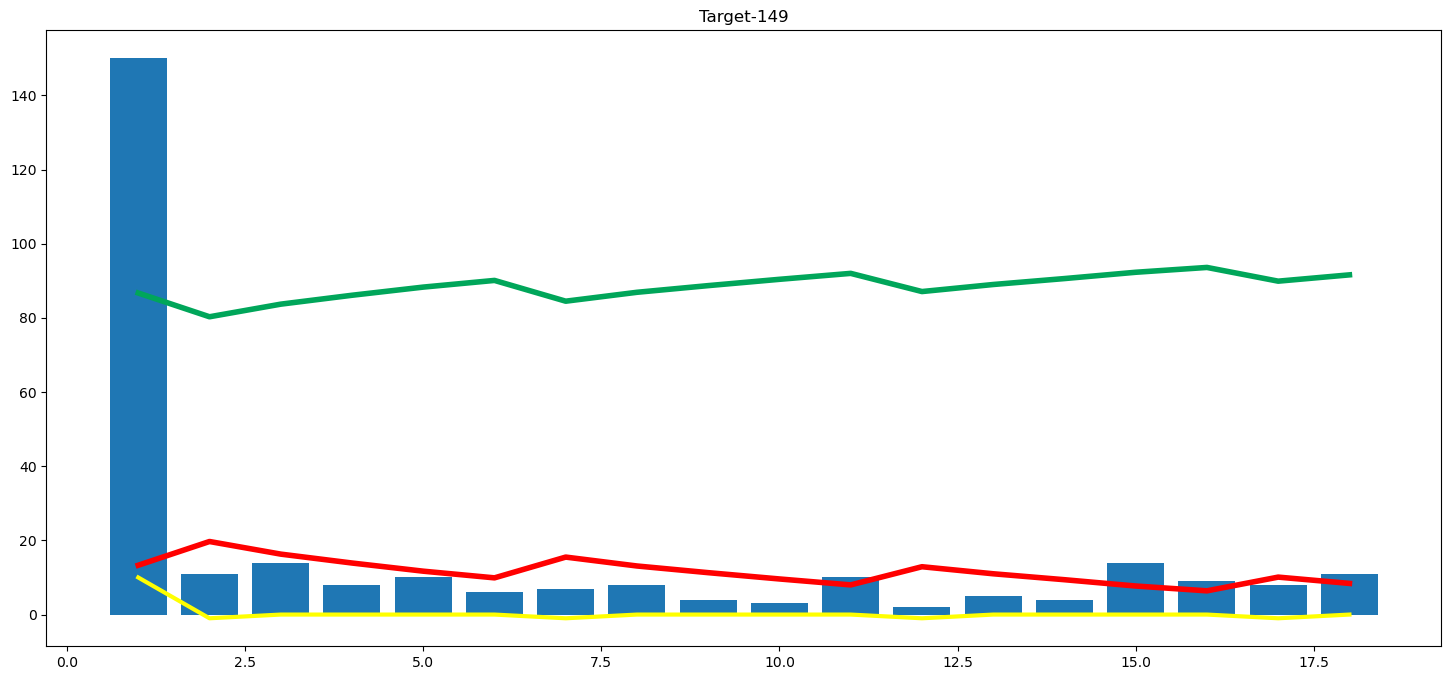

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [152]:
df['city'].unique()

array(['Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Gaddafi Stadium', 'National Stadium', 'Sheikh Zayed Stadium',
       'Multan Cricket Stadium', 'Rawalpindi Cricket Stadium', 'Karachi',
       'Abu Dhabi', 'Lahore'], dtype=object)

In [153]:
df['batting_team'].unique()

array(['Quetta Gladiators', 'Karachi Kings', 'Islamabad United',
       'Peshawar Zalmi', 'Lahore Qalandars', 'Multan Sultans'],
      dtype=object)

In [154]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))